IMPORTING THE  ESSENTIAL LIBRARIES 📚📚

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR


LOADING THE DATA

In [2]:
main_data=pd.read_csv("data.csv")

EXPLOLATORY DATA ANALYSIS 📈📈

In [3]:
main_data.head()

date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  2014-05-02 00:00:00   313000.0       3.0       1.50         1340      7912   
1  2014-05-02 00:00:00  2384000.0       5.0       2.50         3650      9050   
2  2014-05-02 00:00:00   342000.0       3.0       2.00         1930     11947   
3  2014-05-02 00:00:00   420000.0       3.0       2.25         2000      8030   
4  2014-05-02 00:00:00   550000.0       4.0       2.50         1940     10500   

   floors  waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0     1.5           0     0          3        1340              0      1955   
1     2.0           0     4          5        3370            280      1921   
2     1.0           0     0          4        1930              0      1966   
3     1.0           0     0          4        1000           1000      1963   
4     1.0           0     0          4        1140            800      1976   

   yr_renovated                    street       city  statezip country  
0          2005      18810 Densmore Ave N  Shoreline  WA 98133     USA  
1             0           709 W Blaine St    Seattle  WA 98119     USA  
2             0  26206-26214 143rd Ave SE       Kent  WA 98042     USA  
3             0           857 170th Pl NE   Bellevue  WA 98008     USA  
4          1992         9105 170th Ave NE    Redmond  WA 98052     USA

In [4]:
cleaned_data=pd.DataFrame(main_data[["price","bedrooms","bathrooms","sqft_living","floors","yr_built"]])

In [5]:
cleaned_data.head()

price  bedrooms  bathrooms  sqft_living  floors  yr_built
0   313000.0       3.0       1.50         1340     1.5      1955
1  2384000.0       5.0       2.50         3650     2.0      1921
2   342000.0       3.0       2.00         1930     1.0      1966
3   420000.0       3.0       2.25         2000     1.0      1963
4   550000.0       4.0       2.50         1940     1.0      1976

DATA DEFINITION

In [6]:
cleaned_data.describe()

price     bedrooms    bathrooms   sqft_living       floors  \
count  4.600000e+03  4600.000000  4600.000000   4600.000000  4600.000000   
mean   5.519630e+05     3.400870     2.160815   2139.346957     1.512065   
std    5.638347e+05     0.908848     0.783781    963.206916     0.538288   
min    0.000000e+00     0.000000     0.000000    370.000000     1.000000   
25%    3.228750e+05     3.000000     1.750000   1460.000000     1.000000   
50%    4.609435e+05     3.000000     2.250000   1980.000000     1.500000   
75%    6.549625e+05     4.000000     2.500000   2620.000000     2.000000   
max    2.659000e+07     9.000000     8.000000  13540.000000     3.500000   

          yr_built  
count  4600.000000  
mean   1970.786304  
std      29.731848  
min    1900.000000  
25%    1951.000000  
50%    1976.000000  
75%    1997.000000  
max    2014.000000

VISUALISING INDEPENDENT VARAIBLE'S RELATION WTIH THE DEPENDENT VARAIBLE IN CLEANED DATA

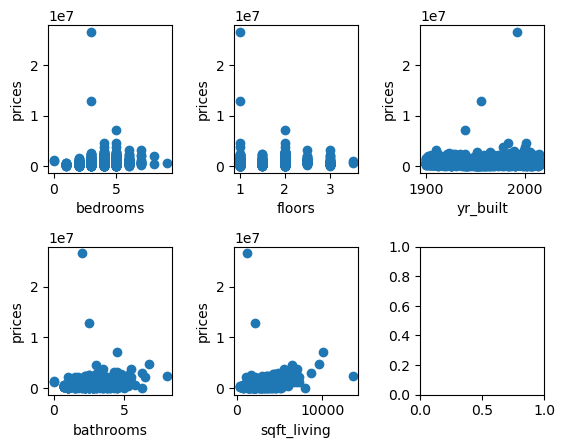

In [7]:
row,col=cleaned_data.shape

fig,axes=plt.subplots(nrows=2,ncols=3)
axes[0,0].scatter(cleaned_data[["bedrooms"]],cleaned_data[["price"]])
axes[0,0].set_ylabel("prices")
axes[0,0].set_xlabel("bedrooms")

axes[0,1].scatter(cleaned_data[["floors"]],cleaned_data[["price"]])
axes[0,1].set_ylabel("prices")
axes[0,1].set_xlabel("floors")

axes[1,0].scatter(cleaned_data[["bathrooms"]],cleaned_data[["price"]])
axes[1,0].set_ylabel("prices")
axes[1,0].set_xlabel("bathrooms")

axes[1,1].scatter(cleaned_data[["sqft_living"]],cleaned_data[["price"]])
axes[1,1].set_ylabel("prices")
axes[1,1].set_xlabel("sqft_living")

axes[0,2].scatter(cleaned_data[["yr_built"]],cleaned_data[["price"]])
axes[0,2].set_ylabel("prices")
axes[0,2].set_xlabel("yr_built")
plt.subplots_adjust(wspace=0.5, hspace=0.5)



In [8]:
x=cleaned_data[["bedrooms","bathrooms","sqft_living","floors","yr_built"]]
y=cleaned_data[["price"]]


TEST TRAIN SET OF THE CLEANED DATA

In [9]:
true=np.random.rand(len(x))<0.8
x_train=x[true]
y_train=y[true]
x_test=x[~true]
y_test=np.array(y[~true])

ROOT MEAN SQUARED ERROR FOR ACCURACY CHECKING

In [10]:
def root_mean_squared_error(y_tst, y_p):
    n = len(y_tst)
    total_error = 0
    for i in range(n):
        temp = (y_tst[i] - y_p[i]) ** 2
        total_error += temp
    rmse = np.sqrt(total_error / n)
    return float(rmse)
rmse_dict={}     

LINEAR REGRESSION MODEL

In [11]:
lin_mod=LinearRegression()

lin_mod.fit(x_train,y_train)
y_cap=np.array(lin_mod.predict(x_test))

lin_reg_rmse=root_mean_squared_error(y_test,y_cap)

rmse_dict.update({"lin_reg":lin_reg_rmse})

RIDGE REGRESSION MODEL


In [12]:
rid_mod=Ridge()

rid_mod.fit(x_train,y_train)
y_cap=np.array(rid_mod.predict(x_test))

rid_reg_rmse=root_mean_squared_error(y_test,y_cap)

rmse_dict.update({"rid_reg":rid_reg_rmse})


LASSO REGRESSION MODEL

In [13]:
lasso_mod=Lasso()

lasso_mod.fit(x_train,y_train)
y_cap=np.array(lasso_mod.predict(x_test))

lasso_reg_rmse=root_mean_squared_error(y_test,y_cap)

rmse_dict.update({"lasso_reg":lasso_reg_rmse})

ELASTIC NET REGRESSION MODEL

In [14]:
elasticnet_mod=ElasticNet()

elasticnet_mod.fit(x_train,y_train)
y_cap=np.array(elasticnet_mod.predict(x_test))

elasticnet_reg_rmse=root_mean_squared_error(y_test,y_cap)

rmse_dict.update({"elasticnet_reg":elasticnet_reg_rmse})

RANDOM FOREST REGRESSION

In [15]:
rfr_mod=RandomForestRegressor()

rfr_mod.fit(x_train,y_train.to_numpy().ravel())
y_cap=np.array(rfr_mod.predict(x_test))

rfr_reg_rmse=root_mean_squared_error(y_test,y_cap)

rmse_dict.update({"rfr_reg":rfr_reg_rmse})


SUPPORT VECTOR REGRESSION

In [16]:

svr_mod=SVR()

svr_mod.fit(x_train,y_train.to_numpy().ravel())
y_cap=np.array(svr_mod.predict(x_test))

svr_reg_rmse=root_mean_squared_error(y_test,y_cap)

rmse_dict.update({"svr_reg":svr_reg_rmse})

MODEL COMPARISON BY USING THE RMSE VALUE OF THE MODEL

In [17]:
rmse_dict = dict(sorted(rmse_dict.items(), key=lambda item: item[1]))
rmse_dict

{'rid_reg': 264811.46354052884,
 'lasso_reg': 264811.9421360478,
 'lin_reg': 264811.97550317465,
 'elasticnet_reg': 266025.4362546654,
 'svr_reg': 350289.46735000296,
 'rfr_reg': 394260.17071777873}

PLOTING RMSE SCORES 📊📊📊

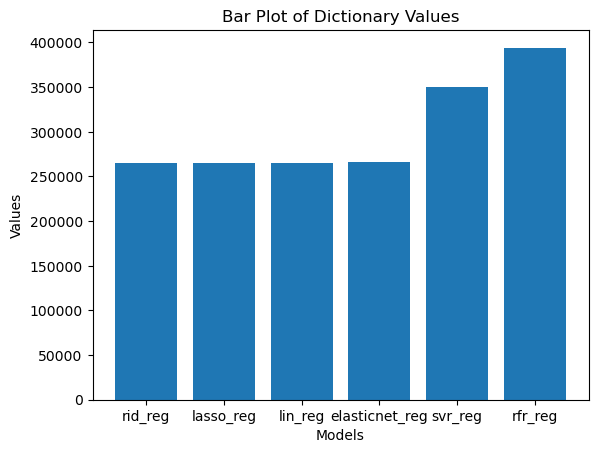

In [18]:
keys = list(rmse_dict.keys())
values = list(rmse_dict.values())

# Create a bar plo
plt.bar(keys, values)

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Values')
plt.title('Bar Plot of Dictionary Values')

# Show the plot
plt.show()

THANK YOU FOR REACHING THE END🤗🤗